In [6]:
from __future__ import print_function, division

from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt


plt.ion()   # interactive mode

# 模型存儲路徑
model_save_path = './output/first_10/model_final.pth'

# ------------------------ 加載數據 --------------------------- #
# Data augmentation and normalization for training
# Just normalization for validation
# 定義預訓練變換
preprocess_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])


class_names = [
    'I-Others','E-M1-Al Residue',
    'I-Dust','T-ITO1-Hole','T-M2-Fiber','I-Sand Defect',
    'I-Glass Scratch','E-AS-Residue','I-Oil Like','T-M1-Fiber',
    'E-ITO1-Hole','P-ITO1-Residue','E-AS-BPADJ','I-Laser Repair',
    'P-AS-NO','T-ITO1-Residue','I-M2-Crack','E-M2-PR Residue',
    'E-M2-Short','T-Brush defect','T-AS-Residue','T-AS-Particle Small',
    'E-M2-Residue','T-M2-Particle','P-M2-Residue','P-AS-Residue',
    'P-M1-Residue','T-M1-Particle','P-M2-Short','T-AS-SiN Hole',
    'P-AS-BPADJ','P-M2-Open','P-M1-Short',
]  # 這個順序很重要，要和訓練時候的類名順序一致

ModuleNotFoundError: No module named 'PIL'

In [5]:
!pip install pillow

     |████████████████████████████████| 49.8MB 42.4MB/s eta 0:00:01
  ERROR: Complete output from command /snap/jupyter/6/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-dnn2kld0/pillow/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-qz92rg3i --python-tag cp37:
  ERROR: running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.7
  creating build/lib.linux-x86_64-3.7/PIL
  copying src/PIL/WalImageFile.py -> build/lib.linux-x86_64-3.7/PIL
  copying src/PIL/PpmImagePlugin.py -> build/lib.linux-x86_64-3.7/PIL
  copying src/PIL/XpmImagePlugin.py -> build/lib.linux-x86_64-3.7/PIL
  copying src/PIL/ImageWin.py -> build/lib.linux-x86_64-3.7/PIL
  copying src/PIL/MspImagePlugin.py -> build/lib.linux-x86_64-3.7/PIL
  copying src/PIL/PdfImagePlugin.py -> build/lib.

Failed to build pillow
  Running setup.py install for pillow ... error
    ERROR: Complete output from command /snap/jupyter/6/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-dnn2kld0/pillow/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-hnqht_0r/install-record.txt --single-version-externally-managed --compile --user --prefix=:
    ERROR: running install
    running build
    running build_py
    creating build
    creating build/lib.linux-x86_64-3.7
    creating build/lib.linux-x86_64-3.7/PIL
    copying src/PIL/WalImageFile.py -> build/lib.linux-x86_64-3.7/PIL
    copying src/PIL/PpmImagePlugin.py -> build/lib.linux-x86_64-3.7/PIL
    copying src/PIL/XpmImagePlugin.py -> build/lib.linux-x86_64-3.7/PIL
    copying src/PIL/ImageWin.py -> build/lib.linux-x86_64-3.7/PIL
    copying src/PIL/MspImagePlu

In [10]:
!python -V

Python 3.7.3


In [59]:
!nvidia-smi

Tue Oct 18 16:12:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| 53%   45C    P2   120W / 350W |   4969MiB / 12288MiB |      9%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import cv2,os
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Get image
#im = cv2.imread("/home/joseph/PycharmProjects/detectron2/datasets/VOC2007/JPEGImages/000112.jpg")


root = './tryatt/'
for i in os.listdir(root):
    pim = root+i
    im = cv2.imread(pim)
    # Get the configuration ready
    cfg = get_cfg()
    cfg.merge_from_file("./configs/PascalVOC-Detection/iOD/ft_22_p_4.yaml")
    cfg.MODEL.WEIGHTS = "./auo33ITDD06output/22_p_4_ft/model_final.pth"
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

    predictor = DefaultPredictor(cfg)
    outputs = predictor(im)

    print(outputs)

    v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs['instances'].to('cpu'))
    img = v.get_image()[:, :, ::-1]
    cv2.imwrite("./prac/"+i, img)
    break


[10/18 17:36:51 d2.modeling.roi_heads.roi_heads]: Invalid class range: []
{'instances': Instances(num_instances=1, image_height=1035, image_width=1380, fields=[pred_boxes = Boxes(tensor([[782.6646, 289.2860, 899.5504, 353.3065]], device='cuda:0')), scores = tensor([0.7912], device='cuda:0'), pred_classes = tensor([6], device='cuda:0'), ])}


In [1]:
requests.get(image_url, stream=True).rawfrom PIL import Image
import torch
from torchvision import models, transforms
from torch.autograd import Variable
from torch.nn import functional as F
import numpy as np
import cv2
import json
classes = {
    'I-Others':0, 'E-M1-Al Residue':1,
    'I-Dust':2,'T-ITO1-Hole':3,'T-M2-Fiber':4,'I-Sand Defect':5,
    'I-Glass Scratch':6,'E-AS-Residue':7,'I-Oil Like':8,'T-M1-Fiber':9,
    'E-ITO1-Hole':10,'P-ITO1-Residue':11,'E-AS-BPADJ':12,'I-Laser Repair':13,
    'P-AS-NO':14,'T-ITO1-Residue':15,'I-M2-Crack':16,'E-M2-PR Residue':17,
    'E-M2-Short':18,'T-Brush defect':19,'T-AS-Residue':20,'T-AS-Particle Small':21,
    'E-M2-Residue':22,'T-M2-Particle':23,'P-M2-Residue':24,'P-AS-Residue':25,
    'P-M1-Residue':26,'T-M1-Particle':27,'P-M2-Short':28,'T-AS-SiN Hole':29,
    'P-AS-BPADJ':30,'P-M2-Open':31,'P-M1-Short':32,
}

In [5]:
img_path = './datasets/VOC2007/JPEGImages/I-Sand_BPADJ/I-Sand_Defect_PV99HC1220-11_27_NGID027500178.jpg'
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

# 图片预处理
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize
])

img_pil = Image.open(img_path)
img_tensor = preprocess(img_pil)
img_variable = Variable(img_tensor.unsqueeze(0))

In [55]:
#coding: utf-8
import os
from PIL import Image
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])

def draw_CAM(model, img_path, save_path, transform=None, visual_heatmap=False):
    '''
    绘制 Class Activation Map
    :param model: 加载好权重的Pytorch model
    :param img_path: 测试图片路径
    :param save_path: CAM结果保存路径
    :param transform: 输入图像预处理方法
    :param visual_heatmap: 是否可视化原始heatmap（调用matplotlib）
    :return:
    '''
    # 图像加载&预处理
    img = Image.open(str(img_path))
    print(img_path)
    if transform:
        img = transform(img)
#     img = img.unsqueeze(0)
#     img = np.asarray(img)
 
    # 获取模型输出的feature/score
#     model.eval()
#     features = model.features(img)
    output = model.classifier(features)
 
    # 为了能读取到中间梯度定义的辅助函数
    def extract(g):
        global features_grad
        features_grad = g
 
    # 预测得分最高的那一类对应的输出score
    pred = torch.argmax(output).item()
    pred_class = output[:, pred]
 
    features.register_hook(extract)
    pred_class.backward() # 计算梯度
 
    grads = features_grad   # 获取梯度
 
    pooled_grads = torch.nn.functional.adaptive_avg_pool2d(grads, (1, 1))
 
    # 此处batch size默认为1，所以去掉了第0维（batch size维）
    pooled_grads = pooled_grads[0]
    features = features[0]
    # 512是最后一层feature的通道数
    for i in range(512):
        features[i, ...] *= pooled_grads[i, ...]
 
    # 以下部分同Keras版实现
    heatmap = features.detach().numpy()
    heatmap = np.mean(heatmap, axis=0)
 
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
 
    # 可视化原始热力图
    if visual_heatmap:
        plt.matshow(heatmap)
        plt.show()
 
    img = cv2.imread(img_path)  # 用cv2加载原始图像
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # 将热力图的大小调整为与原始图像相同
    heatmap = np.uint8(255 * heatmap)  # 将热力图转换为RGB格式
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # 将热力图应用于原始图像
    superimposed_img = heatmap * 0.4 + img  # 这里的0.4是热力图强度因子
    cv2.imwrite(save_path, superimposed_img)  # 将图像保存到硬盘

In [33]:
import shutil
f = open('datasets/VOC2007/ImageSets/Main/test.txt')
root = './datasets/VOC2007/JPEGImages/'
for line in f.readlines():
    line = line.strip('\n')
#     print(line.split('/'))
    shutil.copy(root+line+'.jpg','./tryatt/'+line.split('/')[1]+'.jpg')

['I-Sand_BPADJ', 'I-Sand_Defect_PV99HC1220-11_27_NGID027500178']
['P-AS-Residue', 'P-AS-Residue_N_Horizon_PV91HCLE40-03_5_NGID005500083']
['E-M2-Short', 'M2-Short_Y_P_bright0.7V92H1F060-07_26_1F060-0700260008']
['I-Oil_Like', 'I-Oil_Like_PV9_bright1.30H9BT60-01_30_216.b.1600518835']
['P-M1-Residue', 'P-M1-Residue_Y_vertic_PV91HCKU60-10_6_282.b.1641491794']
['P-M2-Short', 'P-M2-Short_Y_P_verticV92H1L290-13_9_NGID009500019']
['T-M1-Particle', 'M1-Particle__b1.3_verfN_PV92H1F990-16_10_1F990-1600100002']
['I-M2-Crack', 'M2-Crack_PV9_b1.5_verf0H10Z80-04_25_NGID025500062']
['I-Dust', 'I-Dust_PV99HC1180-01_14_NGID014500029']
['T-Brush_defect', 'Brush_defect_bright1.5_Y_PV92H1HR10-04_22_NGID022500097']
['E-M1-Al_Residue', 'E-M1-Al_Residue_PU99HC1270-12_12_NGID012500125']
['T-AS-Particle_Small', 'T-AS-Particle_Small_Y_PV92H1F950-06_6_1F950-0600060022']
['E-AS-Residue', 'E-AS-Residue_Y_PV92H2AQ60-14_24_NGID024500048']
['I-Sand_BPADJ', 'I-Sand_Defect_PV90HABX40-17_8_195.b.1603709933']
['T-M1-Part

['P-AS-NO', 'AS-NO_Y_PV92_b1.3_horiH2DY20-16_23_NGID023500024']
['P-M2-Open', 'M2-Open_Y_PV_b1.3_verf92H2FV00-12_30_162.b.1645762773']
['I-Laser_Repair', 'Laser_Repair_b1.5_rotate_PV90H9BS90-18_32_NGID032500112']
['P-AS-NO', 'P-AS-NO_Y_PV92_verticH2DY20-16_23_NGID023500004']
['T-Brush_defect', 'T-Brush_defect_vertic_PV90HABX30-04_4_104.b.1603323533']
['T-ITO1-Residue', 'T-ITO1-Residue_Rotate_Y_PV92H1L250-07_23_1L250-0700230001']
['T-M2-Fiber', 'T-M2-Fiber_Y_PV92H2FK70-10_8_NGID008500025']
['T-Brush_defect', 'Brush_defect_b1.3_verf_N_PV91HCLD70-11_6_CLD70-1100060003']
['T-M2-Fiber', 'T-M2-Fiber_Y_PV92H1L320-14_31_NGID031500016']
['P-M2-Open', 'M2-Open_N_PV_b1.3_hori92H2DX90-09_10_NGID010500140']
['P-AS-BPADJ', 'AS-BPADJ_PV9_bright0.79HC1230-09_13_NGID013500002']
['P-ITO1-Residue', 'P-ITO1-Residue_Y_PV92H1L240-03_23_NGID023500001']
['T-M1-Fiber', 'T-M1-Fiber_N_P_verticV92H1FA90-14_17_NGID017500062']
['P-AS-Residue', 'P-AS-Residue_Y_PV92H1EZ60-04_27_NGID027500399']
['P-AS-Residue', 'P-AS-

['P-AS-Residue', 'P-AS-Residue_Y_vertic_PV91HCLZ00-14_23_NGID023500225']
['T-Brush_defect', 'Brush_defect_bright1.5_Y_PV91HCLZ60-13_27_NGID027500170']
['I-M2-Crack', 'M2-Crack_PV9_bright0.50H13U50-07_9_NGID009500062']
['E-AS-BPADJ', 'E-AS-BPADJ_Y_PV92H1HP90-16_18_NGID018500049']
['T-AS-Residue', 'T-AS-Residue_P_verticV90H9BT90-08_26_109.b.1600445645']
['I-Glass_Scratch', 'I-Glass_Scratch_PV99HC1260-03_4_NGID004500019']
['P-M2-Short', 'P-M2-Short_PV9_vertic0H9BT90-05_17_.80.b.1600445157']
['T-AS-Residue', 'T-AS-Residue_PV90H9DE60-04_10_836.b.1600741581']
['T-M1-Fiber', 'T-M1-Fiber_N_P_verticV92H1L300-02_22_1L300-0200220001']
['E-M2-PR_Residue', 'E-M2-PR_Residue_Y_PV92H1EY80-11_16_NGID016500386']
['P-M1-Residue', 'P-M1-Residue_Y_PV91HCRA20-12_5_NGID005500145']
['E-M2-Short', 'E-M2-Short_PV90H13U30-07_17_NGID017500104']
['T-M1-Particle', 'T-M1-Particle_Y_PV92H1F070-15_17_NGID017500081']
['P-M2-Residue', 'P-M2-Residue_Y_vertic_PV92H2G680-02_31_NGID031500147']
['T-AS-Particle_Small', 'T-AS-

['E-M2-PR_Residue', 'E-M2-PR_Residue_Y_PV92H1HQ50-18_29_1HQ50-1800290008']
['I-Others', 'I-Others_PV9OHABX30-15_5_246.b.1603325450']
['P-AS-NO', 'AS-NO_Y_PV92_b1.3_verfH2DY20-16_23_NGID023500004']
['P-M2-Open', 'M2-Open_Y_PV_b0.7_verf92H1E260-09_31_NGID031500104']
['I-Glass_Scratch', 'I-Glass_Scratch_PV90H9BS60-03_9_.83.b.1600455224']
['I-Oil_Like', 'I-Oil_Like_PV9_bright1.30H9DF70-12_32_.31.b.1600946795']
['P-AS-Residue', 'P-AS-Residue_Y_bright1.3_PV92H2B110-17_29_233.b.1645255409']
['T-ITO1-Hole', 'T-ITO1-Hole_PV90HABZ20-09_32_142.b.1603110582']
['P-M1-Residue', 'P-M1-Residue_Y_vertic_PV91HCRA10-09_19_NGID019500024']
['P-M2-Residue', 'P-M2-Residue_Y_PV92H1EZ00-14_22_NGID022500156']
['E-M2-Residue', 'E-M2-Residue_N_PV92H2G670-01_9_.83.b.1646011735']
['P-AS-Residue', 'P-AS-Residue_N_Rotate_PV91HCLD90-09_13_NGID013500119']
['E-AS-BPADJ', 'E-AS-BPADJ_Y_PV92H2B080-12_16_.77.b.1645272330']
['T-ITO1-Hole', 'T-ITO1-Hole_PV99HC1240-17_14_NGID014500094']
['P-AS-BPADJ', 'P-AS-BPADJ_Y_PV91HCR840

['I-Laser_Repair', 'Laser_Repair_b0.7_rotate_PV90H9BS90-11_31_139.b.1600735762']
['P-M2-Open', 'M2-Open_N_PV_bright1.592H1F040-07_10_1F040-0700100005']
['T-M1-Fiber', 'T-M1-Fiber_N_PV92H2FL30-15_32_NGID032500111']
['P-ITO1-Residue', 'P-ITO1-Residue_N_PV92H1F050-03_14_NGID014500053']
['T-M1-Fiber', 'T-M1-Fiber_N_P_verticV92H1EZ10-15_11_1EZ10-1500110005']
['E-M2-Short', 'E-M2-Short_Y_PV92H1HP40-16_32_NGID032500076']
['P-M1-Short', 'P-M1-Short_Y_PV92H1FA10-12_1_NGID001500004']
['E-AS-Residue', 'E-AS-Residue_Y_PV92H2AR70-07_2_NGID002500094']
['P-AS-NO', 'P-AS-NO_Y_PV92_bright1.3H2FK70-14_30_NGID030500015']
['E-AS-Residue', 'E-AS-Residue_N_PV92H2G460-16_18_NGID018500148']
['T-M1-Particle', 'T-M1-Particle__RotateN_PV92H2AQ90-12_26_NGID026500145']
['T-M2-Particle', 'T-M2-Particle_PV90HAA600-07_12_.25.b.1603812112']
['P-AS-NO', 'AS-NO_PV90HA_b1.3_verfBX40-03_29_469.b.1603707449']
['I-M2-Crack', 'M2-Crack_PV9_bright0.59HC1280-06_26_NGID026500039']
['T-M1-Fiber', 'T-M1-Fiber_N_PV92H1F030-03_22_N

In [56]:
for i in os.listdir('./tryatt'):
    draw_CAM('./auo33ITDD06output/22_p_4_ft/model_final.pth','./tryatt/'+i,'./outputi')

./tryatt/I-Glass_Scratch_PV99HC1260-09_22_NGID022500131.jpg


AttributeError: 'str' object has no attribute 'classifier'

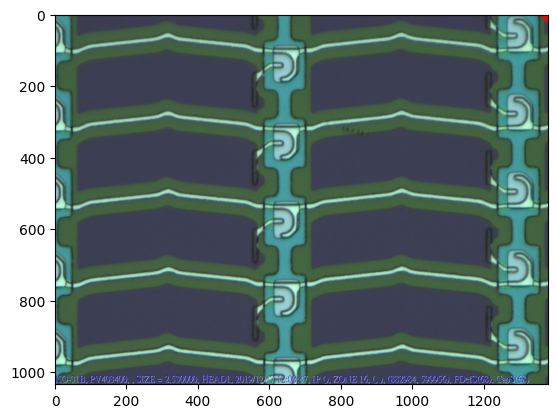

In [46]:
image = Image.open(str('./tryatt/I-Glass_Scratch_PV99HC1260-09_22_NGID022500131.jpg'))
plt.imshow(image)